In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mean_dist_day'>

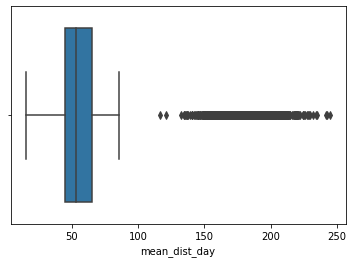

In [ ]:
sns.boxplot(data['mean_dist_day'])

In [ ]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [ ]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [ ]:
features = data.drop(['id'], axis = 1)
features.shape

(4000, 2)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
my_cluster_model = KMeans(n_clusters=2)

In [ ]:
my_cluster_model.fit(features)

KMeans(n_clusters=2)

In [ ]:
np.unique(my_cluster_model.labels_)

array([0, 1], dtype=int32)

In [ ]:
data['cluster'] = my_cluster_model.labels_

In [ ]:
data

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,3
1,3423313212,52.53,25,3
2,3423313724,64.54,27,3
3,3423311373,55.69,22,3
4,3423310999,54.58,25,3
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [ ]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc', 'cluster'], dtype='object')

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


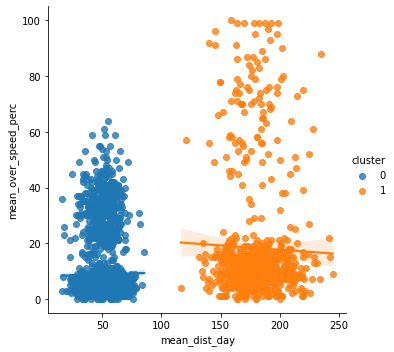

In [ ]:
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=data,hue='cluster');

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


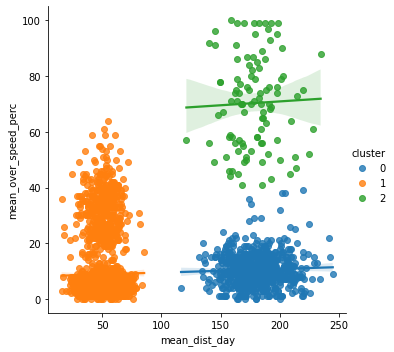

In [ ]:
my_cluster_model = KMeans(n_clusters=3)
my_cluster_model.fit(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=data,hue='cluster');

In [ ]:
my_cluster_model.cluster_centers_

array([[180.34311782,  10.52011494],
       [ 50.04763438,   8.82875   ],
       [177.83509615,  70.28846154]])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


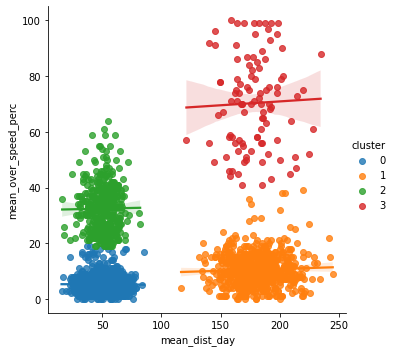

In [ ]:
my_cluster_model = KMeans(n_clusters=4)
my_cluster_model.fit(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=data,hue='cluster');

In [ ]:
my_cluster_model.cluster_centers_

array([[177.83509615,  70.28846154],
       [ 49.98428468,   5.21441441],
       [ 50.46127059,  32.42823529],
       [180.34311782,  10.52011494]])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


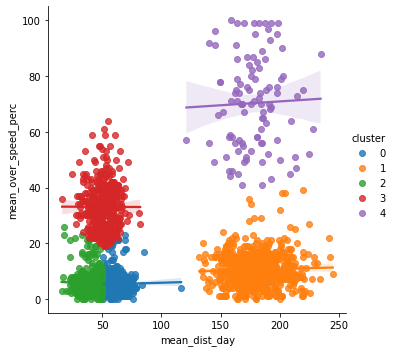

In [ ]:
my_cluster_model = KMeans(n_clusters=5)
my_cluster_model.fit(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=data,hue='cluster');

In [ ]:
my_cluster_model.labels_

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
data.set_index('id').reset_index()

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,2
1,3423313212,52.53,25,2
2,3423313724,64.54,27,2
3,3423311373,55.69,22,2
4,3423310999,54.58,25,2
...,...,...,...,...
3995,3423310685,160.04,10,3
3996,3423312600,176.17,5,3
3997,3423312921,170.91,12,3
3998,3423313630,176.14,5,3
